In [12]:
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import sklearn.metrics as sk
from sklearn.cluster import KMeans
from math import sqrt
from sklearn import preprocessing
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from pandas import get_dummies
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings
import sklearn
import scipy
import numpy
import json
import sys
import csv
import os

In [13]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [14]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [15]:
df=pd.read_csv("observacoescluster.csv")

In [16]:
df.head()

,X;Y
0,0.0402;-0.0050
1,2.3253;3.2499
2,2.0928;3.1758
3,1.4135;3.0197
4,3.2312;1.7430


In [17]:
df.dtypes

X;Y    object
dtype: object

/tmp/ipykernel_29479/1809843051.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


""


/tmp/ipykernel_29479/1809843051.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


ValueError: zero-size array to reduction operation fmin which has no identity

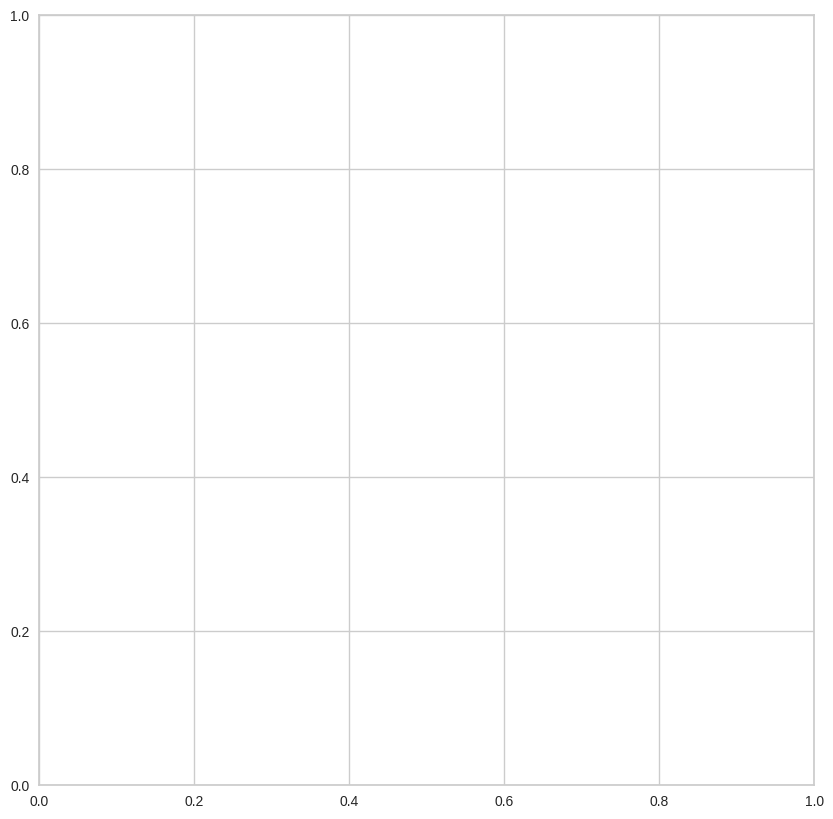

In [18]:
#correltaion matrix/heatmap
df.corr()
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr())
plt.title('X')

In [ ]:
x_onehot=pd.get_dummies(df)

In [ ]:
#standardising data
x_scale = StandardScaler().fit_transform(x_onehot)

In [ ]:
#elbow method to find n clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x_scale)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#check silhouette score
# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=0)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(x_scale)    
visualizer.poof()   

In [ ]:
#applying kmeans algorith
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(x_scale)
plt.scatter(x_scale[:,0],x_scale[:,1],c=pred_y,cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()
#calculating davies bouldin score
sklearn.metrics.davies_bouldin_score(x_scale,pred_y)

In [ ]:
x=df.drop(['R'],axis=1)

In [ ]:
#comparisons
x_kmeans=x.copy()
x_kmeans['R']=pred_y
x_kmeans.groupby('R').mean()
df.groupby('R').mean()

In [ ]:
#hierarchical clustering-plotting dendrogram
dendrogram = sch.dendrogram(sch.linkage(x_scale, method='ward'))

In [ ]:
#applying agglomerative clustering algorithm
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit_predict(x_scale)
labels = model.labels_
#plotting clusters on scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(x_scale[labels==0, 0], x_scale[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(x_scale[labels==1, 0], x_scale[labels==1, 1], s=50, marker='o', color='blue')
sklearn.metrics.davies_bouldin_score(x_scale,labels)

In [ ]:
x_hrcl=x.copy()
x_hrcl['R']=labels
x_hrcl.groupby('R').mean()
df.groupby('R').mean()
